✅ Libraries imported successfully!
📊 Dataset Overview:
Stocks: (50, 7)
Prices: (12104, 8)
Date Range: 2023-01-01 00:00:00 to 2023-09-09 00:00:00
Unique Stocks: 50
🏢 Sector Distribution:
sector
Healthcare     10
Utilities       9
Industrial      7
Technology      6
Consumer        5
Financial       5
Energy          5
Real Estate     3
Name: count, dtype: int64

💰 Market Cap Distribution:
market_cap
Large    21
Small    18
Mid      11
Name: count, dtype: int64

📈 Dividend Yield Statistics:
count    50.000000
mean      0.015574
std       0.007431
min       0.003800
25%       0.011150
50%       0.013900
75%       0.018475
max       0.037900
Name: dividend_yield, dtype: float64


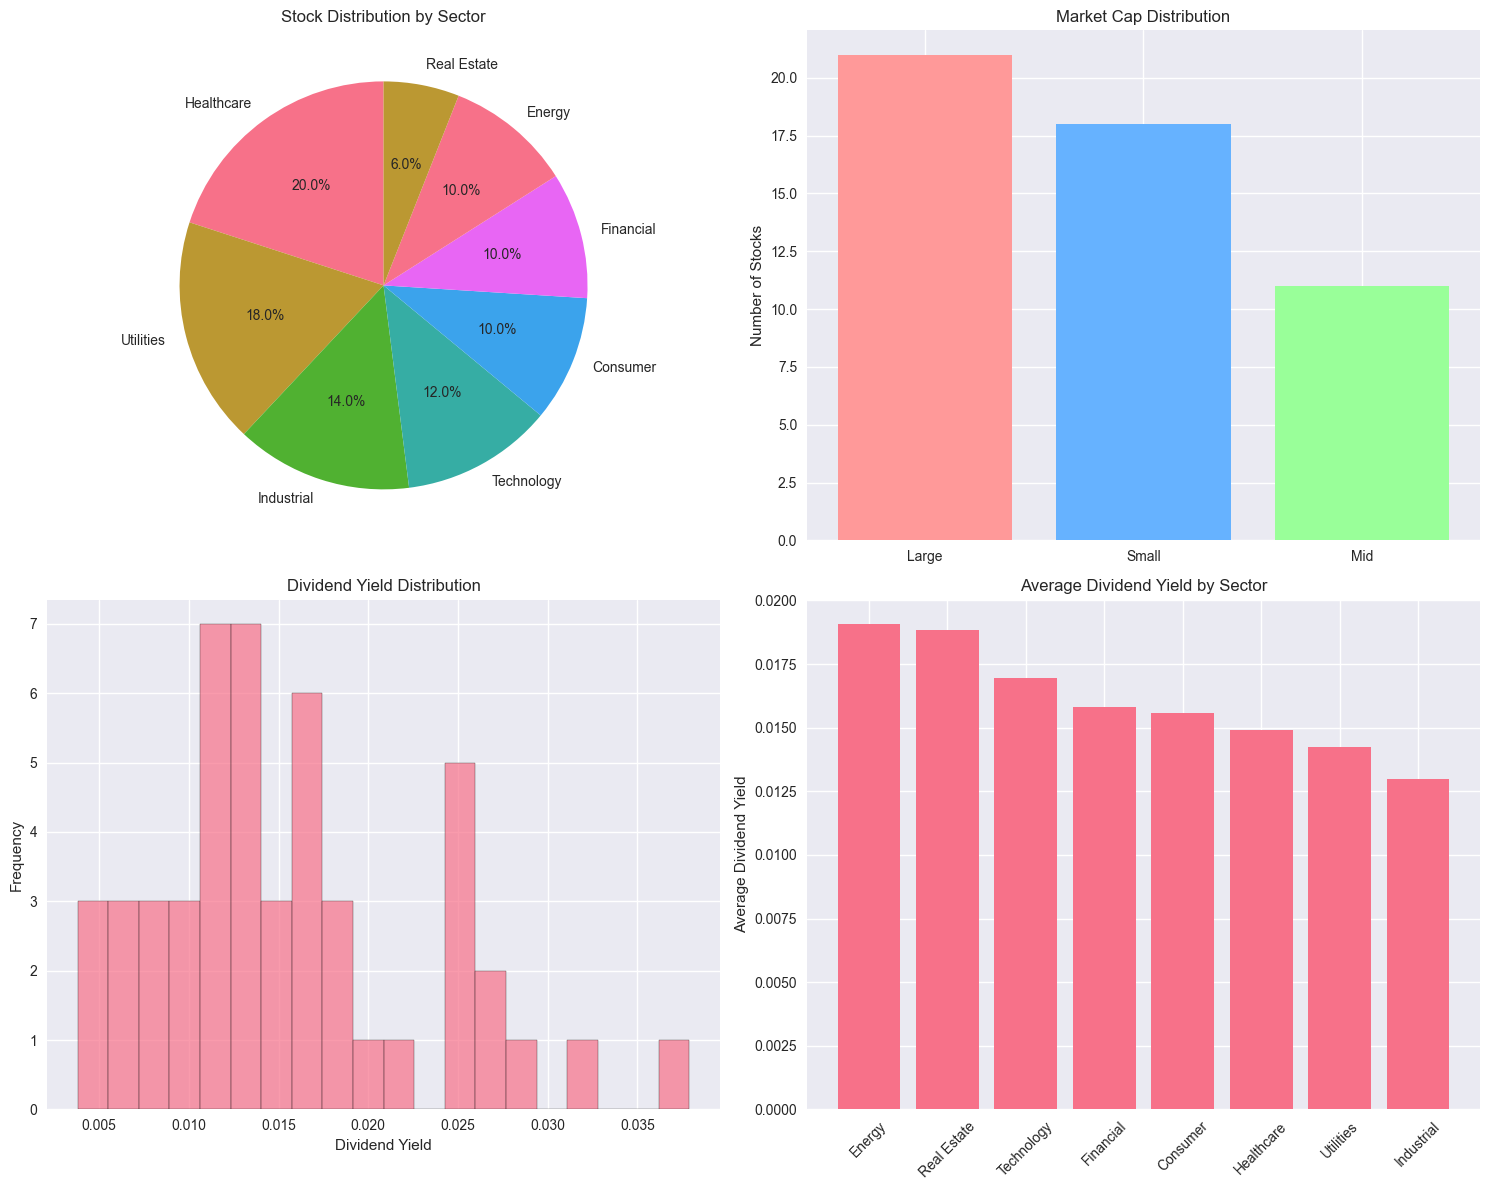

💰 Price Statistics:
               mean    std    min     max
sector                                   
Consumer     100.75  95.38   8.38  292.40
Energy       134.25  49.44  35.01  223.68
Financial     85.78  63.69  11.41  223.85
Healthcare    80.87  61.15  22.53  254.62
Industrial   124.32  92.36  15.33  292.73
Real Estate   73.37  27.13  32.38  130.74
Technology    43.56  28.46  20.02  292.81
Utilities     94.27  77.42  18.29  292.68

📊 Volume Statistics:
                   mean         sum          std
sector                                          
Consumer     1082371.61  1329152337   2484655.56
Energy       4165996.99  5249156206  19514005.41
Financial     476689.69   600629009    718036.34
Healthcare   1392833.40  3509940162   3899767.85
Industrial    993183.97  1719201453   4033033.07
Real Estate   965284.00   729754707   2045331.59
Technology    456281.48   579933765    741912.43
Utilities     572620.87  1189906159   1549979.19


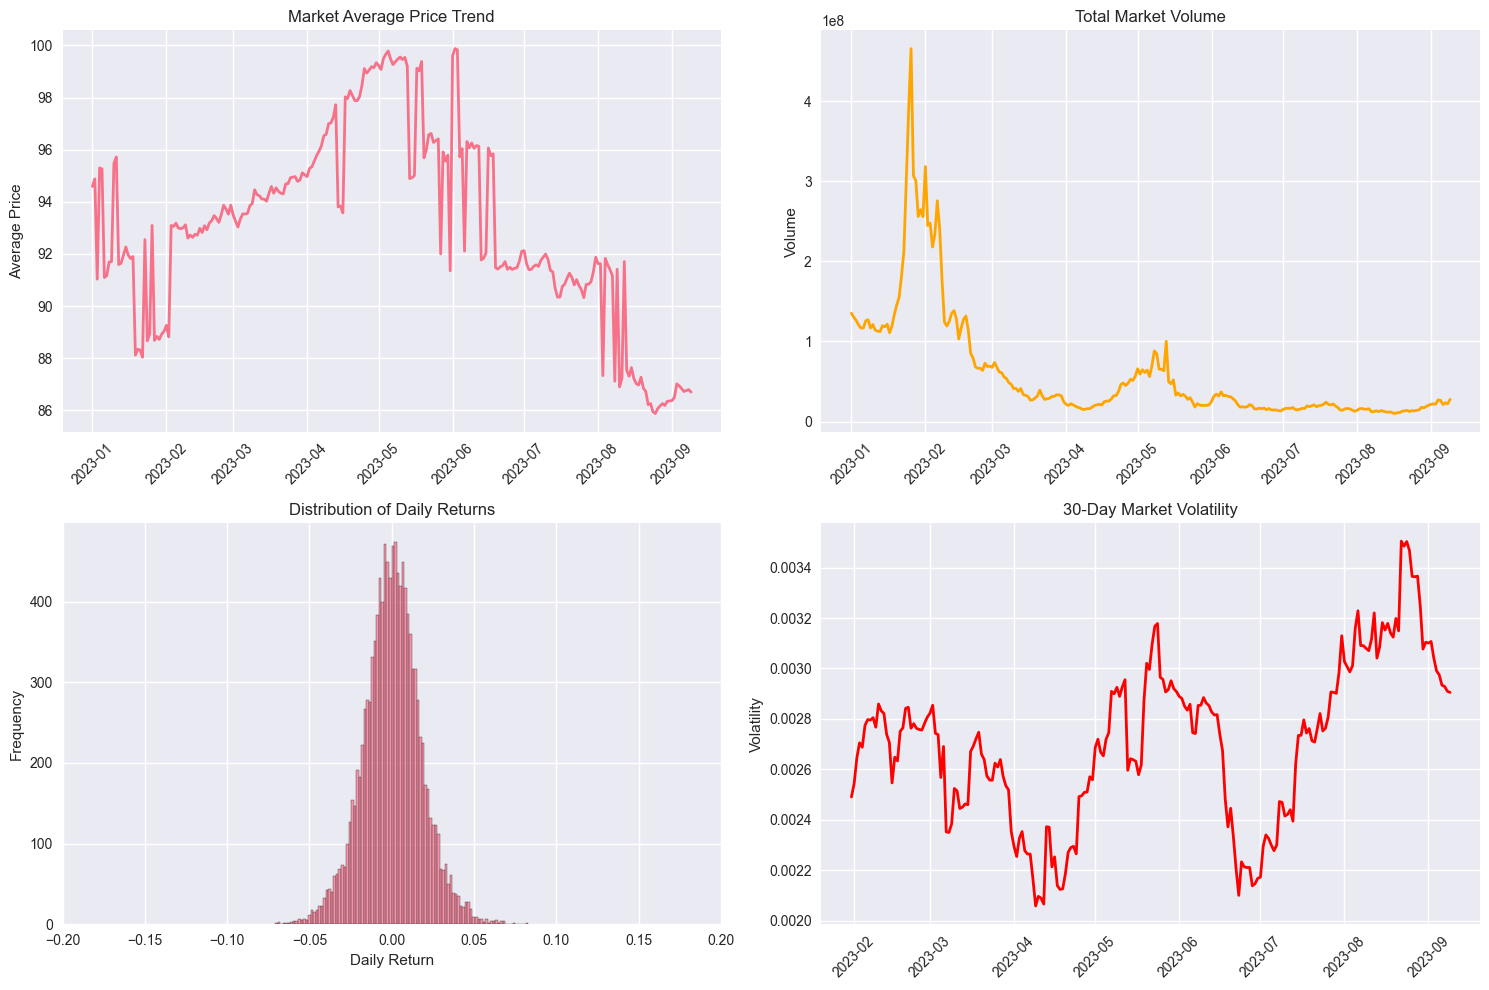

TypeError: incompatible index of inserted column with frame index

In [ ]:
# Financial Stock Analysis - Exploratory Data Analysis
### Step 2: Discovering Patterns and Insights

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Setup plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully!")
stocks = pd.read_csv('../../data/processed/stocks_cleaned.csv')
prices = pd.read_csv('../../data/processed/prices_cleaned.csv')

# Convert date column to datetime
prices['date'] = pd.to_datetime(prices['date'])

print("📊 Dataset Overview:")
print(f"Stocks: {stocks.shape}")
print(f"Prices: {prices.shape}")
print(f"Date Range: {prices['date'].min()} to {prices['date'].max()}")
print(f"Unique Stocks: {prices['stock_id'].nunique()}")
## 1. Stocks Metadata Analysis

# Sector distribution
print("🏢 Sector Distribution:")
sector_counts = stocks['sector'].value_counts()
print(sector_counts)

# Market cap distribution
print("\n💰 Market Cap Distribution:")
market_cap_counts = stocks['market_cap'].value_counts()
print(market_cap_counts)

# Dividend yield analysis
print("\n📈 Dividend Yield Statistics:")
print(stocks['dividend_yield'].describe())
# Plotting stocks metadata
# Visualize stocks metadata
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Sector distribution
sectors = stocks['sector'].value_counts()
axes[0,0].pie(sectors.values, labels=sectors.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Stock Distribution by Sector')

# Market cap distribution
market_cap = stocks['market_cap'].value_counts()
axes[0,1].bar(market_cap.index, market_cap.values, color=['#FF9999', '#66B2FF', '#99FF99'])
axes[0,1].set_title('Market Cap Distribution')
axes[0,1].set_ylabel('Number of Stocks')

# Dividend yield distribution
axes[1,0].hist(stocks['dividend_yield'], bins=20, edgecolor='black', alpha=0.7)
axes[1,0].set_title('Dividend Yield Distribution')
axes[1,0].set_xlabel('Dividend Yield')
axes[1,0].set_ylabel('Frequency')

# Sector vs Dividend Yield
sector_dividends = stocks.groupby('sector')['dividend_yield'].mean().sort_values(ascending=False)
axes[1,1].bar(sector_dividends.index, sector_dividends.values)
axes[1,1].set_title('Average Dividend Yield by Sector')
axes[1,1].set_ylabel('Average Dividend Yield')
axes[1,1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()
# Merge stocks and prices for comprehensive analysis
merged_data = prices.merge(stocks, on='stock_id', how='left')

# Calculate daily returns
merged_data = merged_data.sort_values(['stock_id', 'date'])
merged_data['daily_return'] = merged_data.groupby('stock_id')['close'].pct_change()

# Summary statistics for prices
print("💰 Price Statistics:")
price_stats = merged_data.groupby('sector')['close'].agg(['mean', 'std', 'min', 'max']).round(2)
print(price_stats)

# Volume analysis
print("\n📊 Volume Statistics:")
volume_stats = merged_data.groupby('sector')['volume'].agg(['mean', 'sum', 'std']).round(2)
print(volume_stats)
## 2. Market Performance Over Time
# Time series analysis of market performance
market_daily = merged_data.groupby('date').agg({
    'close': 'mean',
    'volume': 'sum',
    'daily_return': 'mean'
    }).reset_index()

# Calculate market volatility (rolling standard deviation)
market_daily['volatility_30d'] = market_daily['daily_return'].rolling(window=30).std()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# Market price trend
axes[0,0].plot(market_daily['date'], market_daily['close'], linewidth=2)
axes[0,0].set_title('Market Average Price Trend')
axes[0,0].set_ylabel('Average Price')
axes[0,0].tick_params(axis='x', rotation=45)

# Market volume trend
axes[0,1].plot(market_daily['date'], market_daily['volume'], linewidth=2, color='orange')
axes[0,1].set_title('Total Market Volume')
axes[0,1].set_ylabel('Volume')
axes[0,1].tick_params(axis='x', rotation=45)

# Daily returns distribution
axes[1,0].hist(merged_data['daily_return'].dropna(), bins=100, alpha=0.7, edgecolor='black')
axes[1,0].set_title('Distribution of Daily Returns')
axes[1,0].set_xlabel('Daily Return')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_xlim(-0.2, 0.2)  # Focus on typical range

# Market volatility
axes[1,1].plot(market_daily['date'], market_daily['volatility_30d'], linewidth=2, color='red')
axes[1,1].set_title('30-Day Market Volatility')
axes[1,1].set_ylabel('Volatility')
axes[1,1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

## 3. Sector Performance Analysis

# Sector performance analysis
sector_performance = merged_data.groupby(['sector', 'date']).agg({
    'close': 'mean',
    'volume': 'sum',
    'daily_return': 'mean'
    }).reset_index()
   
# Calculate cumulative returns by sector
sector_performance = sector_performance.sort_values(['sector', 'date'])
sector_performance['cumulative_return'] = (
    sector_performance.groupby('sector')['daily_return']
    .transform(lambda x: (1 + x).cumprod() - 1)
)
    
# Pivot for better visualization
sector_returns_pivot = sector_performance.pivot_table(
    index='date', 
    columns='sector', 
    values='cumulative_return'
)

# Plot sector performance
plt.figure(figsize=(14, 8))
for sector in sector_returns_pivot.columns:
    plt.plot(sector_returns_pivot.index, sector_returns_pivot[sector], label=sector, linewidth=2)

plt.title('Sector Cumulative Returns Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 4. Correlation Analysis

# Select top stocks by market cap for correlation analysis
top_stocks = stocks[stocks['market_cap'] == 'Large']['stock_id'].tolist()
top_prices = merged_data[merged_data['stock_id'].isin(top_stocks)]

# Pivot to get stock returns
returns_pivot = top_prices.pivot_table(
    index='date', 
    columns='symbol', 
    values='daily_return'
    ).dropna()

# Calculate correlation matrix
correlation_matrix = returns_pivot.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(
    correlation_matrix, 
    mask=mask,
    annot=True, 
    cmap='coolwarm', 
    center=0,
    fmt='.2f',
    square=True
)
plt.title('Stock Returns Correlation Matrix (Top Large-Cap Stocks)', fontsize=16)
plt.tight_layout()
plt.show()

## 5. Risk-Return Analysis

# Calculate risk-return metrics for each stock
stock_metrics = merged_data.groupby(['stock_id', 'symbol', 'sector']).agg({
    'daily_return': ['mean', 'std', 'count'],
    'close': 'last'
    }).round(4)
    # Flatten column names
stock_metrics.columns = ['avg_return', 'volatility', 'trading_days', 'last_price']
stock_metrics = stock_metrics.reset_index()

# Calculate Sharpe ratio (assuming risk-free rate = 0 for simplicity)
stock_metrics['sharpe_ratio'] = stock_metrics['avg_return'] / stock_metrics['volatility']

# Remove infinite values
stock_metrics = stock_metrics[~stock_metrics['sharpe_ratio'].isin([np.inf, -np.inf])]

# Plot risk-return scatter plot
plt.figure(figsize=(12, 8))

scatter = plt.scatter(
    stock_metrics['volatility'] * 100,  # Convert to percentage
    stock_metrics['avg_return'] * 100,   # Convert to percentage
    c=stock_metrics['sharpe_ratio'],
    cmap='viridis',
    alpha=0.7,
    s=60
)

plt.colorbar(scatter, label='Sharpe Ratio')
plt.xlabel('Volatility (%)', fontsize=12)
plt.ylabel('Average Daily Return (%)', fontsize=12)
plt.title('Risk-Return Profile of Stocks', fontsize=16)
plt.grid(True, alpha=0.3)

# Highlight some interesting stocks
top_sharpe = stock_metrics.nlargest(5, 'sharpe_ratio')
for _, stock in top_sharpe.iterrows():
    plt.annotate(
        stock['symbol'], 
        (stock['volatility'] * 100, stock['avg_return'] * 100),
        xytext=(5, 5), 
        textcoords='offset points',
        fontweight='bold'
    )
    plt.tight_layout()
    plt.show()
## 6. Advanced Visualizations with Plotly

# Interactive sector performance chart
fig = px.line(
    sector_performance, 
    x='date', 
    y='cumulative_return', 
    color='sector',
    title='Interactive Sector Performance Over Time',
    labels={'cumulative_return': 'Cumulative Return', 'date': 'Date'}
)
fig.show()

# Interactive risk-return bubble chart
fig = px.scatter(
    stock_metrics,
    x='volatility',
    y='avg_return',
    color='sector',
    size='last_price',
    hover_data=['symbol', 'sharpe_ratio'],
    title='Interactive Risk-Return Analysis',
    labels={
        'volatility': 'Volatility',
        'avg_return': 'Average Return',
        'sector': 'Sector',
        'last_price': 'Last Price'
    }
)
fig.show()

## 7. Key Insights Summary

print("🔍 KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("=" * 60)

# 1. Market overview
total_trading_days = merged_data['date'].nunique()
avg_daily_return = merged_data['daily_return'].mean() * 100
market_volatility = merged_data['daily_return'].std() * 100

print(f"\n📈 Market Overview:")
print(f"   • Total trading days: {total_trading_days}")
print(f"   • Average daily return: {avg_daily_return:.2f}%")
print(f"   • Market volatility: {market_volatility:.2f}%")

# 2. Sector performance
sector_perf_summary = sector_performance.groupby('sector')['cumulative_return'].last().sort_values(ascending=False)
best_sector = sector_perf_summary.index[0]
worst_sector = sector_perf_summary.index[-1]

print(f"\n🏆 Sector Performance:")
print(f"   • Best performing sector: {best_sector} ({sector_perf_summary.iloc[0]:.2%})")
print(f"   • Worst performing sector: {worst_sector} ({sector_perf_summary.iloc[-1]:.2%})")

# 3. Risk-return leaders
best_sharpe = stock_metrics.nlargest(1, 'sharpe_ratio').iloc[0]
highest_return = stock_metrics.nlargest(1, 'avg_return').iloc[0]
lowest_volatility = stock_metrics.nsmallest(1, 'volatility').iloc[0]

print(f"\n⭐ Stock Highlights:")
print(f"   • Best risk-adjusted return: {best_sharpe['symbol']} (Sharpe: {best_sharpe['sharpe_ratio']:.2f})")
print(f"   • Highest average return: {highest_return['symbol']} ({highest_return['avg_return']*100:.2f}% daily)")
print(f"   • Lowest volatility: {lowest_volatility['symbol']} ({lowest_volatility['volatility']*100:.2f}% daily)")

# 4. Correlation insights
corr_insights = correlation_matrix.unstack().sort_values(ascending=False)
highest_corr = corr_insights[corr_insights < 1.0].head(1)
lowest_corr = corr_insights.tail(1)
print(f"\n🔗 Correlation Insights:")
print(f"   • Highest correlation: {highest_corr.index[0][0]} & {highest_corr.index[0][1]} ({highest_corr.iloc[0]:.3f})")
print(f"   • Lowest correlation: {lowest_corr.index[0][0]} & {lowest_corr.index[0][1]} ({lowest_corr.iloc[0]:.3f})")
print("\n" + "=" * 60)
print("🎯 EDA completed! Proceed to Stock Analysis (03_stock_analysis.ipynb)")